<a href="https://colab.research.google.com/github/Az140304/MachineLearning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

In [6]:
%pip install tensorflow pandas matplotlib seaborn numpy scipy kaggle

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.6 MB 6.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.6 MB 6.3 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/11.6 MB 6.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.6 MB 6.4 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [1]:
!kaggle datasets download -d wangziang/waste-pictures -p data --unzip

Dataset URL: https://www.kaggle.com/datasets/wangziang/waste-pictures
License(s): unknown




  0%|          | 0.00/2.05G [00:00<?, ?B/s]
  0%|          | 1.00M/2.05G [00:01<41:45, 878kB/s]
  0%|          | 2.00M/2.05G [00:01<20:47, 1.76MB/s]
  0%|          | 3.00M/2.05G [00:01<13:49, 2.65MB/s]
  0%|          | 4.00M/2.05G [00:01<10:39, 3.43MB/s]
  0%|          | 5.00M/2.05G [00:01<08:55, 4.10MB/s]
  0%|          | 6.00M/2.05G [00:02<07:52, 4.64MB/s]
  0%|          | 7.00M/2.05G [00:02<07:11, 5.08MB/s]
  0%|          | 8.00M/2.05G [00:02<06:45, 5.41MB/s]
  0%|          | 9.00M/2.05G [00:02<06:27, 5.65MB/s]
  0%|          | 10.0M/2.05G [00:02<06:15, 5.84MB/s]
  1%|          | 11.0M/2.05G [00:02<06:06, 5.97MB/s]
  1%|          | 12.0M/2.05G [00:03<06:00, 6.07MB/s]
  1%|          | 13.0M/2.05G [00:03<06:08, 5.94MB/s]
  1%|          | 14.0M/2.05G [00:03<05:51, 6.22MB/s]
  1%|          | 15.0M/2.05G [00:03<05:49, 6.25MB/s]
  1%|          | 16.0M/2.05G [00:03<05:49, 6.26MB/s]
  1%|          | 17.0M/2.05G [00:03<05:49, 6.25MB/s]
  1%|          | 18.0M/2.05G [00:04<05:49, 6.24MB/s]
  

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
data_dir = 'data'
os.listdir(data_dir)

['test', 'train']

In [4]:
test_dir = "data/test/"
train_dir = "data/train/"

In [10]:
print(len(tf.config.list_physical_devices('GPU')))

0


# Exploratory Dataset

In [23]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
data_flow = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 17872 images belonging to 34 classes.


In [24]:
class_labels = list(data_flow.class_indices.keys())
total_label = len(class_labels)

print("Total kategori yang ada : ", total_label)
print("Kategori yang ada:", class_labels)

Total kategori yang ada :  34
Kategori yang ada: ['XLight', 'bandaid', 'battery', 'bowlsanddishes', 'bread', 'bulb', 'cans', 'carton', 'chopsticks', 'cigarettebutt', 'diapers', 'facialmask', 'glassbottle', 'leaflet', 'leftovers', 'medicinebottle', 'milkbox', 'nailpolishbottle', 'napkin', 'newspaper', 'nut', 'penholder', 'pesticidebottle', 'plasticbag', 'plasticbottle', 'plasticene', 'rag', 'tabletcapsule', 'thermometer', 'toothbrush', 'toothpastetube', 'toothpick', 'traditionalChinesemedicine', 'watermelonrind']


In [25]:
from collections import Counter

class_counts = Counter()
for label in class_labels:
    class_counts[label] = len(os.listdir(os.path.join(train_dir, label)))

print("Distribusi gambar per kategori:", class_counts)

Distribusi gambar per kategori: Counter({'nailpolishbottle': 986, 'leftovers': 930, 'penholder': 882, 'battery': 839, 'watermelonrind': 810, 'newspaper': 763, 'XLight': 755, 'plasticene': 755, 'plasticbag': 751, 'pesticidebottle': 737, 'bread': 732, 'tabletcapsule': 701, 'thermometer': 700, 'leaflet': 683, 'bulb': 681, 'bowlsanddishes': 610, 'facialmask': 601, 'cans': 595, 'diapers': 567, 'medicinebottle': 526, 'napkin': 442, 'rag': 440, 'glassbottle': 422, 'toothbrush': 361, 'bandaid': 292, 'toothpastetube': 252, 'chopsticks': 195, 'nut': 192, 'plasticbottle': 184, 'carton': 173, 'milkbox': 128, 'toothpick': 98, 'cigarettebutt': 54, 'traditionalChinesemedicine': 35})


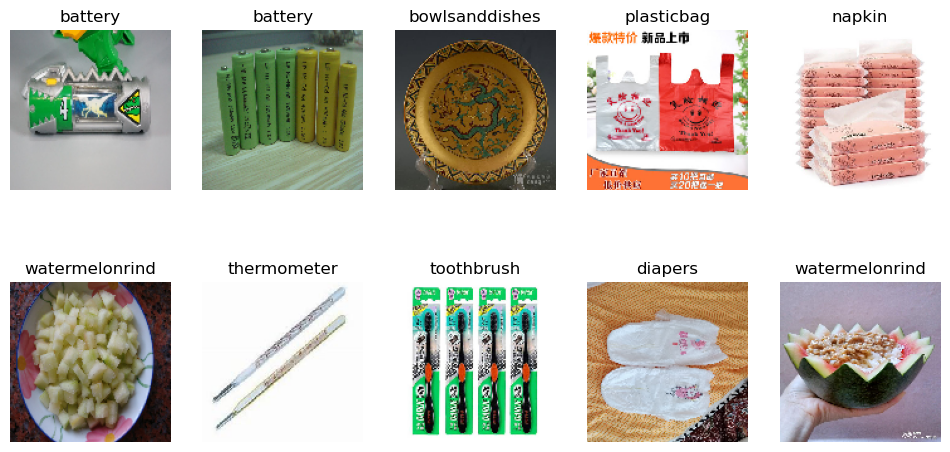

In [8]:
def plot_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Ambil gambar pertama dari batch
        plt.title(class_labels[np.argmax(label[0])])
        plt.axis("off")
    plt.show()

plot_images(data_flow)

In [9]:
img_shape = data_flow.image_shape
print("Dimensi gambar yang digunakan:", img_shape)

Dimensi gambar yang digunakan: (128, 128, 3)


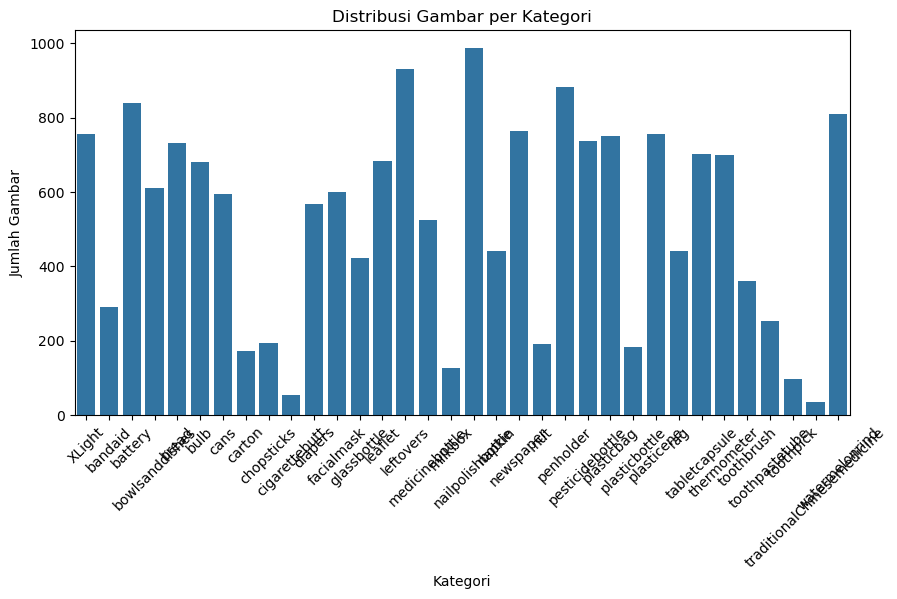

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribusi Gambar per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=45)
plt.show()

# Preprocessing Data

## Image Data Generator

In [34]:
target_size = (224, 224)
batch_size = 32

# Generator untuk train dan validation set (20% dari data training untuk validation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Split 20% untuk validation
)

# Generator untuk test set (tanpa augmentasi, hanya normalisasi)
test_datagen = ImageDataGenerator(rescale=1./255)

## Load Dataset

In [35]:
# Flow untuk training data
train_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Flow untuk validation data
val_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Flow untuk test data
test_flow = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Tidak diacak untuk evaluasi akhir
)

Found 14308 images belonging to 34 classes.
Found 3564 images belonging to 34 classes.
Found 5756 images belonging to 34 classes.


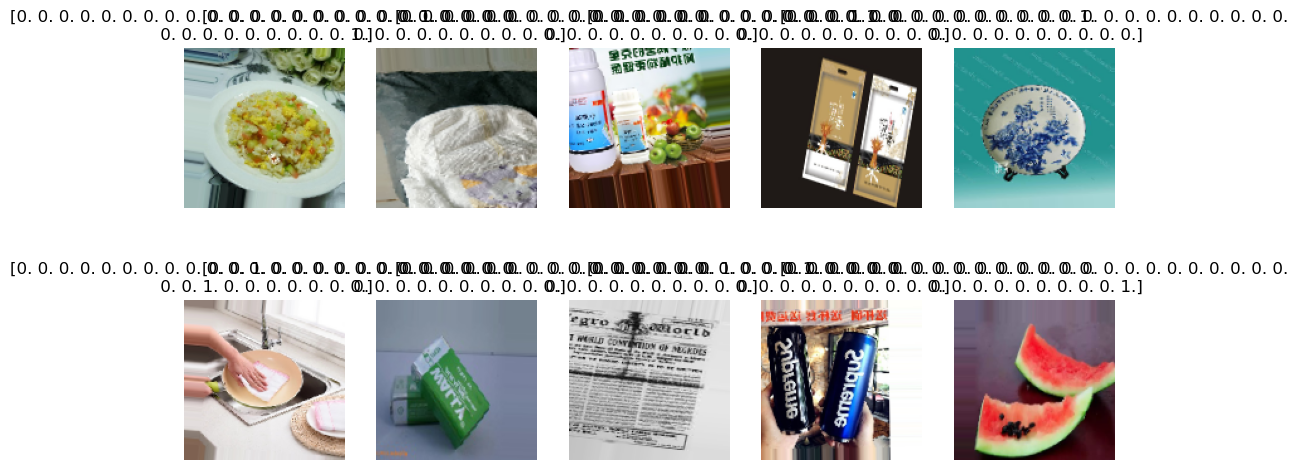

In [13]:
def plot_augmented_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Menampilkan gambar pertama dari batch
        plt.title(label[0])
        plt.axis("off")
    plt.show()

# Visualisasi beberapa gambar dari train_flow
plot_augmented_images(train_flow)

In [28]:
from tensorflow.keras.layers import Dropout,Dense
model = tf.keras.models.Sequential([ 
		tf.keras.Input(shape=(224, 224, 3)),
        # Convolution and Pooling layers
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.GlobalAveragePooling2D(),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(total_label, activation='softmax')




    ]) 

  
model.compile( 
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
) 
    
    ### END CODE HERE #

In [47]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [48]:
base_model.trainable = False

In [49]:
image_batch, label_batch = next(iter(train_flow))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [50]:
from tensorflow.keras.layers import Dropout,Dense

model = tf.keras.Sequential(
    [
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        tf.keras.layers.Dense(total_label, activation="softmax")
    ]
)

model.compile( 
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        metrics=['accuracy']
) 

In [13]:
model = create_model()

NameError: name 'create_model' is not defined

In [51]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 34)             │         4,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,426,338 (9.26 MB)

 Trainable params: 168,354 (657.63 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [52]:
history = model.fit(
	train_flow,
	epochs=25,
	validation_data=val_flow,
)

Epoch 1/25
323/448 ━━━━━━━━━━━━━━━━━━━━ 2:53 1s/step - accuracy: 0.2906 - loss: 2.7105

c:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


448/448 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.3366 - loss: 2.5198 - val_accuracy: 0.7006 - val_loss: 1.0416
Epoch 2/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.6405 - loss: 1.2983 - val_accuracy: 0.7444 - val_loss: 0.8828
Epoch 3/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 855s 2s/step - accuracy: 0.6862 - loss: 1.0730 - val_accuracy: 0.7559 - val_loss: 0.8335
Epoch 4/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 810s 2s/step - accuracy: 0.7046 - loss: 0.9944 - val_accuracy: 0.7792 - val_loss: 0.7704
Epoch 5/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 652s 1s/step - accuracy: 0.7238 - loss: 0.9167 - val_accuracy: 0.7741 - val_loss: 0.7486
Epoch 6/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 678s 2s/step - accuracy: 0.7365 - loss: 0.8783 - val_accuracy: 0.7820 - val_loss: 0.7331
Epoch 7/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 731s 2s/step - accuracy: 0.7498 - loss: 0.8393 - val_accuracy: 0.7907 - val_loss: 0.7279
Epoch 8/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 673s 2s/step - accuracy: 0.7570 - loss: 0.8066 - val_accuracy: 0.795

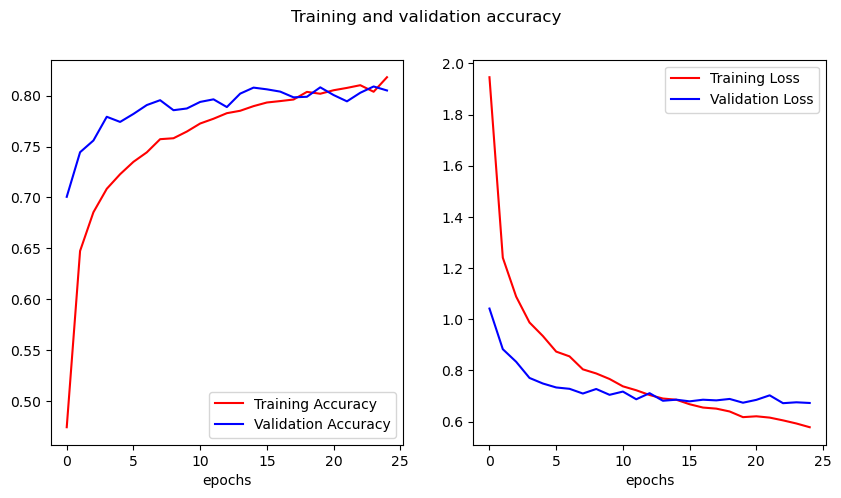

In [53]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [54]:
test_loss, test_accuracy = model.evaluate(test_flow)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.8527 - loss: 0.5444
Test Loss: 0.6852465271949768
Test Accuracy: 0.8108060956001282


In [55]:
model.save("garbage_classification_tf_v2.h5")

In [66]:
#tf.saved_model.save(model, "garbage_classification_tf_v2")
model.save("garbage_classification_tf_v2.keras")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=garbage_classification_tf_v2.pb.